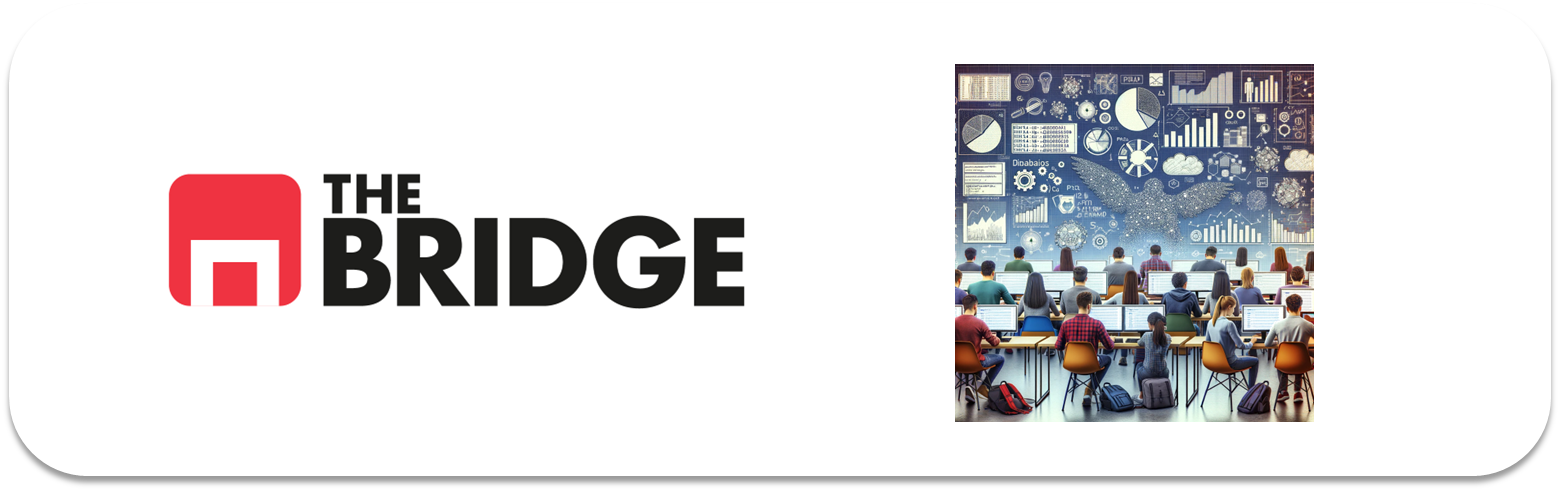

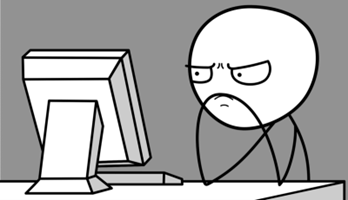

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [ ]:
advert = pd.read_csv("./data/advertising_ml.csv")
advert.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35 years,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31 years,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26 years,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29 years,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35 años,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
advert["Timestamp"]= pd.to_datetime(advert["Timestamp"])
advert["New_age"] = advert["Age"].str[:2]
advert.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,New_age
0,68.95,35 years,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,35
1,80.23,31 years,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,31
2,69.47,26 years,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,26
3,74.15,29 years,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,29
4,68.37,35 años,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,35


In [21]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   object        
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  New_age                   1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 86.1+ KB


In [22]:
advert.describe()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000
mean,65.000200,55000.000080,180.000100,0.481000,2016-04-10 10:34:06.636000256,0.50000
min,32.600000,13996.500000,104.780000,0.000000,2016-01-01 02:52:10,0.00000
25%,51.360000,47031.802500,138.830000,0.000000,2016-02-18 02:55:42,0.00000
50%,68.215000,57012.300000,183.130000,0.000000,2016-04-07 17:27:29.500000,0.50000
75%,78.547500,65470.635000,218.792500,1.000000,2016-05-31 03:18:14,1.00000
max,91.430000,79484.800000,269.960000,1.000000,2016-07-24 00:22:16,1.00000
std,15.853615,13414.634022,43.902339,0.499889,NaN,0.50025


### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

In [ ]:
# problama de clasificacion, modelo supervisado porque hay target -> "Clicked on Ad"

### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definicón de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

In [ ]:
# Daily Time Spent on Site	-> tiempo en minutos sobre la pagina web
# Age -> inutil con la creacion de New_age
# Area Income
# Daily Internet Usage -> tiempo diario en minuto en internet
# Ad Topic Line	
# City	-> Alta cardinalidad, quizas no util
# Male	-> binaria 
# Country	-> pais 
# Timestamp	-> to-datetime, no creo que sea util proque formato distinto, tb podria haber varios time zone, etc. no hay suficiente info sobre esta variable
# Clicked on Ad -> binaria, target
# New_age -> edad

In [25]:
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["Tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

card_tipo(advert)

,Card,%_Card,Tipo,Tipo_sugerido,tipo_sugerido
Daily Time Spent on Site,900,90.0,float64,Categorica,Numerica continua
Age,83,8.3,object,Categorica,Numerica discreta
Area Income,1000,100.0,float64,Categorica,Numerica continua
Daily Internet Usage,966,96.6,float64,Categorica,Numerica continua
Ad Topic Line,1000,100.0,object,Categorica,Numerica continua
City,969,96.9,object,Categorica,Numerica continua
Male,2,0.2,int64,Categorica,Binaria
Country,237,23.7,object,Categorica,Numerica discreta
Timestamp,1000,100.0,datetime64[ns],Categorica,Numerica continua
Clicked on Ad,2,0.2,int64,Categorica,Binaria


### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

In [ ]:
#no tengo nulos

### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [31]:


from sklearn.model_selection import train_test_split

In [34]:
train_set,test_set = train_test_split(advert, test_size= 0.2 , random_state=42)
len(test_set)


200

### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

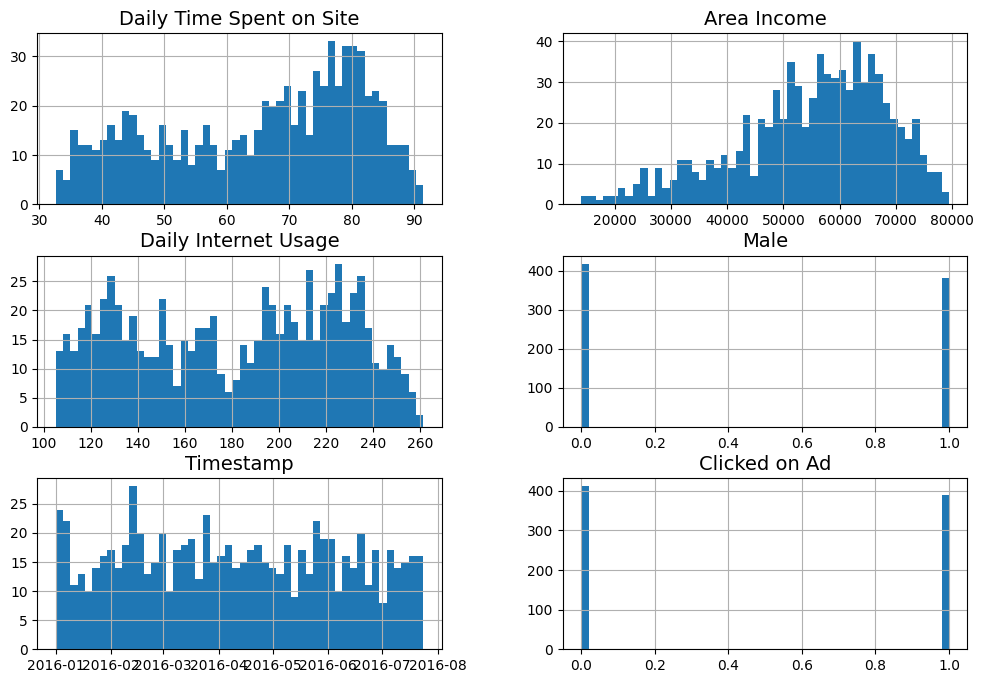

In [35]:
train_set.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

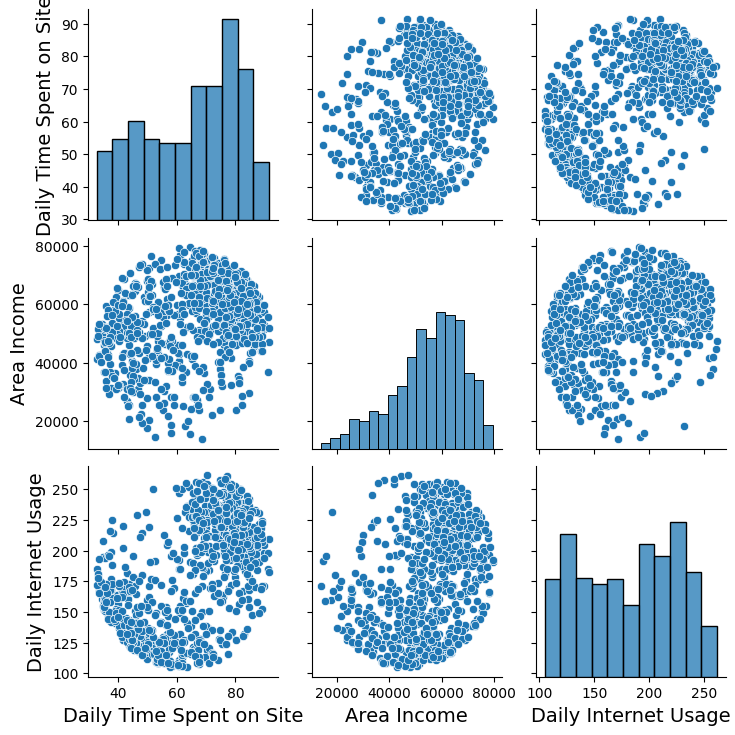

In [41]:
columnas = ["Daily Time Spent on Site"	, "Area Income", "Daily Internet Usage"]
#columnas = corr_matrix["Clicked on Ad"].index.to_list()
sns.pairplot(train_set[columnas]);

In [ ]:
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix["Clicked on Ad"].sort_values(ascending = False) # fuerte correlacion inversa!


Clicked on Ad               1.000000
Male                       -0.043798
Area Income                -0.498504
Daily Time Spent on Site   -0.745492
Daily Internet Usage       -0.812130
Name: Clicked on Ad, dtype: float64

In [42]:
corr_matrix

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,0.310189,0.538092,-0.029358,-0.745492
Area Income,0.310189,1.000000,0.366520,-0.019635,-0.498504
Daily Internet Usage,0.538092,0.366520,1.000000,0.037744,-0.812130
Male,-0.029358,-0.019635,0.037744,1.000000,-0.043798
Clicked on Ad,-0.745492,-0.498504,-0.812130,-0.043798,1.000000


### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selecció de features:

In [ ]:
# clicked on Ad, Daily Internet Usage, Daily Time Spent on Site, Area Income